# 1. Data Exploration

In [86]:
# Import data manipulation libraries
import numpy as np
import pandas as pd

# Import data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rc
import seaborn as sns

# Set graph defaults
plt.rc('font', family='serif', size=10)
plt.rc('legend', fontsize=10)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['axes.unicode_minus'] = False

### 1.1 Data Summary

In [2]:
# Read in data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

# Merge data
df = y_train.join(X_train)

# View sample of data
df.head()

,class,ra,dec,rowv,colv,sky_u,sky_g,sky_r,sky_i,sky_z,...,psffwhm_z,redshift,waveMin,waveMax,wCoverage,spectroFlux_u,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z
0,GALAXY,193.501580,-3.151499,0.001558,-0.003090,1.485249,1.918151,4.959499,10.499020,32.93853,...,1.294442,0.084459,3797.519,9200.258,0.3679,6.787869,16.94696,36.79082,55.93771,71.01184
1,STAR,193.285642,49.189768,-0.000454,0.002103,0.995259,1.377672,3.382322,7.532795,24.20448,...,1.124869,-0.000174,3801.894,9183.326,0.3692,39.508860,70.64217,116.61060,145.60520,160.23250
2,GALAXY,150.991449,6.370981,-0.002789,-0.003372,1.061719,1.655002,3.331498,5.424337,14.75673,...,1.171532,0.118706,3823.843,9183.326,0.3775,13.236710,43.51529,114.39910,170.16740,227.93710
3,GALAXY,187.682335,-2.672471,-0.000691,-0.003080,1.267892,1.849097,5.440842,10.755410,34.14946,...,1.431124,0.091831,3805.397,9206.615,0.3792,8.067329,28.89629,69.58190,102.09230,135.12630
4,GALAXY,148.597128,57.509841,-0.000070,0.004862,1.312444,1.804335,4.948974,8.895027,30.10676,...,1.086376,0.079584,3806.274,9206.615,0.3662,13.455560,37.11879,72.44161,101.22820,116.49640


In [3]:
# Get summary of data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ra             100000 non-null  float64
 1   dec            100000 non-null  float64
 2   rowv           100000 non-null  float64
 3   colv           100000 non-null  float64
 4   sky_u          100000 non-null  float64
 5   sky_g          100000 non-null  float64
 6   sky_r          100000 non-null  float64
 7   sky_i          100000 non-null  float64
 8   sky_z          100000 non-null  float64
 9   psfMag_u       100000 non-null  float64
 10  psfMag_g       100000 non-null  float64
 11  psfMag_r       100000 non-null  float64
 12  psfMag_i       100000 non-null  float64
 13  psfMag_z       100000 non-null  float64
 14  fiberMag_u     100000 non-null  float64
 15  fiberMag_g     100000 non-null  float64
 16  fiberMag_r     100000 non-null  float64
 17  fiberMag_i     100000 non-null

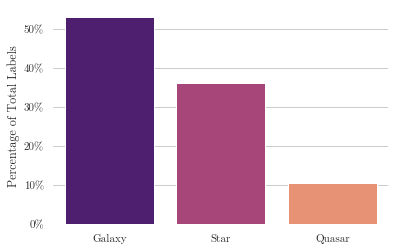

In [37]:
# Get composition of class
data = df['class'].value_counts(normalize=True).to_frame().reset_index()
data["class"] = data["class"] * 100
data['index'] = ["Galaxy", "Star", "Quasar"]

# Plot data
ax = sns.barplot(data=data, x="index", y="class", palette="magma")
ax.set(title = "",
       ylabel = "Percentage of Total Labels", xlabel = "")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.set(font="CMU Serif", style="whitegrid")
sns.despine(left=True, bottom=True)
ax

# Export plot
fig = ax.get_figure()
fig.savefig("composition.png", dpi=1200, bbox_inches="tight") 

In [5]:
# Get table summarising key properties of predictors
data_summary = pd.DataFrame()
data_summary["mean"] = df.mean()
data_summary["median"] = df.median()
data_summary["std"] = df.std()
data_summary["min"] = df.min()
data_summary["max"] = df.max()
data_summary["mean_galaxy"] = df[df["class"] == "GALAXY"].mean()
data_summary["mean_star"] = df[df["class"] == "STAR"].mean()
data_summary["mean_qso"] = df[df["class"] == "QSO"].mean()

# Identify variables where any category is more than one STD from another category
data_summary["sig_dif"] =\
(abs(data_summary["mean_galaxy"] - data_summary["mean_star"]) > data_summary["std"]) |\
(abs(data_summary["mean_galaxy"] - data_summary["mean_qso"]) > data_summary["std"]) |\
(abs(data_summary["mean_star"] - data_summary["mean_qso"]) > data_summary["std"])

# Export table
#data_summary.to_csv("data_summary.csv", index=False)
data_summary

/var/folders/ws/9hc4t42j3ls9vb_fw81ddmhw0000gn/T/ipykernel_23439/659768205.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_summary["mean"] = df.mean()
/var/folders/ws/9hc4t42j3ls9vb_fw81ddmhw0000gn/T/ipykernel_23439/659768205.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_summary["median"] = df.median()
/var/folders/ws/9hc4t42j3ls9vb_fw81ddmhw0000gn/T/ipykernel_23439/659768205.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_summary["std"] = df.std()
/var/fol

,mean,median,std,min,max,mean_galaxy,mean_star,mean_qso,sig_dif
ra,177.786080,172.701324,78.681319,0.004481,359.994814,179.871114,174.798183,177.572002,False
dec,24.201131,14.467339,25.551633,-11.252825,68.731483,24.488560,22.753711,27.726644,False
rowv,-0.699739,0.000282,83.655129,-9999.0,1.385939,-0.564816,-1.101171,0.000778,False
colv,-0.699938,0.000015,83.655128,-9999.0,2.516905,-0.564982,-1.101336,0.000286,False
sky_u,1.407573,1.316534,0.430776,0.68253,24.26804,1.399262,1.429571,1.373792,False
...,...,...,...,...,...,...,...,...,...
spectroFlux_u,46.585950,19.963315,116.632588,-26.89975,13972.56,14.759490,97.037045,33.227016,False
spectroFlux_g,99.610528,41.466120,442.033014,-0.976257,72270.13,36.970993,209.750503,36.089289,False
spectroFlux_r,168.557002,73.362675,1032.839279,-1.527746,189664.3,77.944547,337.498177,43.656750,False
spectroFlux_i,212.161530,97.324980,1370.838761,-2.818702,260694.5,113.849882,402.948937,50.929719,False


/Users/jessicarapson/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


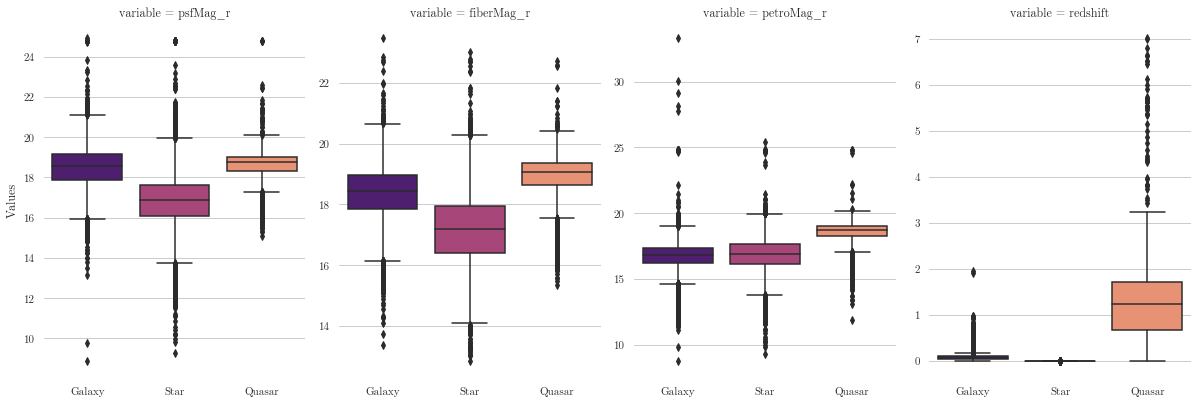

In [197]:
# Identify features with large difference between classes
data = df[["class", "psfMag_r", "fiberMag_r", "petroMag_r", "redshift"]].reset_index()
data = pd.melt(data, id_vars=["index", "class"])
data = data.replace({"class": {"GALAXY": "Galaxy", "STAR": "Star", "QSO": "Quasar"}})

# Plot data
ax = sns.FacetGrid(data, col="variable", height=6, aspect=.7, sharey=False)
ax.map(sns.boxplot, "class", "value", palette="magma")
ax.axes[0,0].set_ylabel('Values')
ax.axes[0,0].set_xlabel("")
ax.axes[0,1].set_xlabel("")
ax.axes[0,2].set_xlabel("")
ax.axes[0,3].set_xlabel("")
sns.set(font="CMU Serif", style="whitegrid")
sns.despine(left=True, bottom=True)

# Export plot
plt.savefig("box.png", dpi=1200, bbox_inches="tight") 

### 1.2 Missing Features

In [6]:
# Identify number of rows with missing data
cols_missing = data_summary[data_summary["min"] == -9999.0].index.to_list()
rows_missing = []
for i in cols_missing:
    rows_missing = rows_missing + df[df["rowv"] == -9999.0].index.to_list()
len(set(rows_missing))

7

### 1.3 Outliers

In [7]:
# Get row ids more than 5 STD away from mean
cols_outlier = []
rows_outlier = []
for i in X_train.columns.to_list():
    diff = abs(df[i] - data_summary.loc[i]["mean"]) / data_summary.loc[i]["std"]
    diff_rows = diff[diff > 10].index.to_list()
    rows_outlier = rows_outlier + diff_rows
    if len(diff_rows) > 0:
        cols_outlier.append(i)
        
# Get unique row ids and remove ids that already have missing data
len(list(set(rows_outlier) - set(rows_missing)))

1326

### 1.4 Multicollinearity

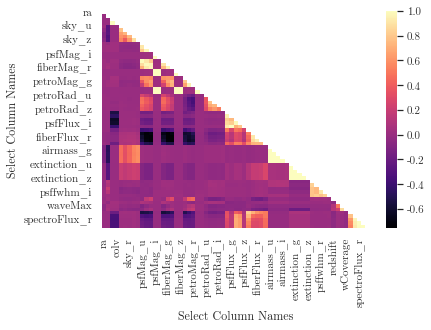

In [81]:
# Plot correlation matrix
mask = np.triu(np.ones_like(df.corr()))
ax = sns.heatmap(df.corr(), mask=mask, cmap="magma")
ax.set(title = "",
       ylabel = "Select Column Names", xlabel = "Select Column Names")
sns.set(font="CMU Serif", style="whitegrid")
sns.despine(left=True, bottom=True)
ax

# Export plot
fig = ax.get_figure()
fig.savefig("correlation.png", dpi=1200, bbox_inches="tight") 

In [119]:
# Get list of top correlated columns
top_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False)
top_corr = top_corr.to_frame(name="correlation").reset_index()
top_corr[top_corr["level_0"] != top_corr["level_1"]].head(30)

,level_0,level_1,correlation
63,extinction_z,extinction_u,1.000000
64,extinction_u,extinction_z,1.000000
65,extinction_i,extinction_g,1.000000
66,extinction_g,extinction_i,1.000000
67,extinction_z,extinction_g,1.000000
68,extinction_g,extinction_z,1.000000
69,extinction_g,extinction_u,1.000000
70,extinction_u,extinction_g,1.000000
71,extinction_r,extinction_z,1.000000
72,extinction_z,extinction_r,1.000000
